# **multiclass waste classification**
---
- CNN transfer model : **mobilenetv2** was trained on multiclass dataset we prepared which model classifyes waste into type of recyclable waste.
- we will check the performance before and after fine tuning based on which trained model is saved for deployment. 

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np


In [5]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 15


## **data agumenation** only for train

In [3]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

val_test_gen = ImageDataGenerator(rescale=1./255)


In [4]:
train_data = train_gen.flow_from_directory(
    "recyclable_dataset/train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_data = val_test_gen.flow_from_directory(
    "recyclable_dataset/val",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_data = val_test_gen.flow_from_directory(
    "recyclable_dataset/test",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)


Found 3833 images belonging to 6 classes.
Found 818 images belonging to 6 classes.
Found 828 images belonging to 6 classes.


In [5]:
NUM_CLASSES = train_data.num_classes
print("Classes:", train_data.class_indices)


Classes: {'cardboard': 0, 'e-waste': 1, 'glass': 2, 'metal': 3, 'paper': 4, 'plastic': 5}


---
## **BUILD MULTI-CLASS MODEL**

 Architecture

#### MobileNetV2 (Frozen)
↓
#### GlobalAveragePooling
↓
#### Dense(256, ReLU)
↓
#### Dropout(0.5)
↓
#### Dense(NUM_CLASSES, Softmax)


In [6]:
base_model = MobileNetV2(
    input_shape=IMG_SIZE + (3,),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False


In [7]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation="softmax")
])


In [8]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,587,462 (9.87 MB)

 Trainable params: 329,478 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

---
## **TRAIN THE multi class MODEL**

In [9]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS
)


Epoch 1/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 32s 257ms/step - accuracy: 0.6340 - loss: 0.9802 - val_accuracy: 0.7543 - val_loss: 0.6428
Epoch 2/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 31s 259ms/step - accuracy: 0.7649 - loss: 0.6357 - val_accuracy: 0.8056 - val_loss: 0.5253
Epoch 3/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 31s 260ms/step - accuracy: 0.7921 - loss: 0.5632 - val_accuracy: 0.7971 - val_loss: 0.5410
Epoch 4/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 32s 265ms/step - accuracy: 0.8090 - loss: 0.5007 - val_accuracy: 0.8056 - val_loss: 0.5194
Epoch 5/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 33s 274ms/step - accuracy: 0.8236 - loss: 0.4688 - val_accuracy: 0.8191 - val_loss: 0.4990
Epoch 6/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 35s 293ms/step - accuracy: 0.8330 - loss: 0.4409 - val_accuracy: 0.8374 - val_loss: 0.4672
Epoch 7/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 33s 274ms/step - accuracy: 0.8552 - loss: 0.3879 - val_accuracy: 0.8350 - val_loss: 0.4629
Epoch 8/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 33s 270ms/step - accuracy: 0.8544 - loss: 0

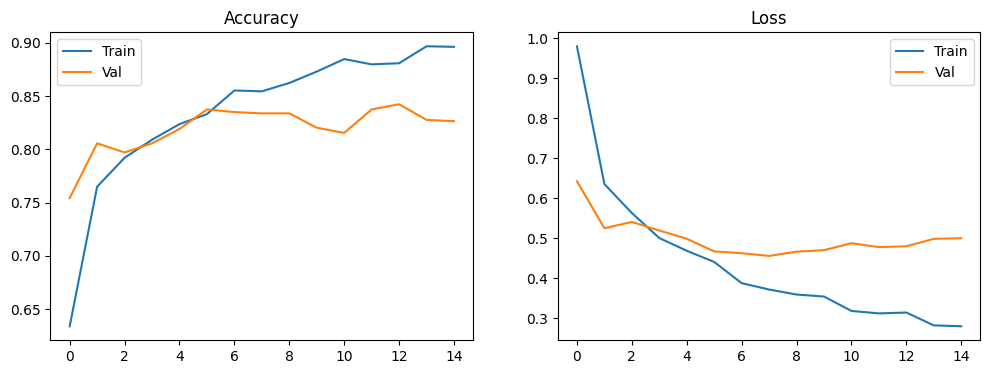

In [10]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Val")
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Val")
plt.title("Loss")
plt.legend()

plt.show()


### **daignoises**
1. training
- Accuracy keeps increasing → ~0.90
- Loss keeps decreasing → ~0.28

 which means Model is fitting the training data very well

2. Validation
- Accuracy plateaus around 0.83–0.85
- Loss decreases initially, then starts increasing after ~epoch 9

 Model starts memorizing training data, not generalizing- **overfitting**




***fine tuning a model that is already overfitting, Fine-tuning will make it worse, not better***. , snice more parameters = more overfitting.


---
## **re-train model** with early stopping
snice I detected overfitting from the validation loss curve so i want to apply early stopping to restore the best-performing weights, preventing further memorization and improving generalization.” then after i will check performance again if its good then i will lightly fine tune if needed.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np


In [6]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [3]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

val_test_gen = ImageDataGenerator(rescale=1./255)

In [4]:
train_data = train_gen.flow_from_directory(
    "recyclable_dataset/train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_data = val_test_gen.flow_from_directory(
    "recyclable_dataset/val",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_data = val_test_gen.flow_from_directory(
    "recyclable_dataset/test",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)


Found 3833 images belonging to 6 classes.
Found 818 images belonging to 6 classes.
Found 828 images belonging to 6 classes.


In [5]:
NUM_CLASSES = train_data.num_classes
print("Classes:", train_data.class_indices)


Classes: {'cardboard': 0, 'e-waste': 1, 'glass': 2, 'metal': 3, 'paper': 4, 'plastic': 5}


In [7]:
base_model = MobileNetV2(
    input_shape=IMG_SIZE + (3,),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False


In [8]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation="softmax")
])


In [10]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)




## Add **EarlyStopping**

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=3,            # wait upto 3 epochs if not improve stop 
    restore_best_weights=True  # store the best trained model
)


In [12]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=[early_stop]
)


Epoch 1/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 32s 258ms/step - accuracy: 0.6321 - loss: 0.9976 - val_accuracy: 0.7665 - val_loss: 0.6177
Epoch 2/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 31s 255ms/step - accuracy: 0.7634 - loss: 0.6328 - val_accuracy: 0.8117 - val_loss: 0.5352
Epoch 3/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 31s 258ms/step - accuracy: 0.7983 - loss: 0.5504 - val_accuracy: 0.8093 - val_loss: 0.5363
Epoch 4/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 31s 257ms/step - accuracy: 0.8145 - loss: 0.4908 - val_accuracy: 0.8178 - val_loss: 0.5162
Epoch 5/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 32s 269ms/step - accuracy: 0.8315 - loss: 0.4573 - val_accuracy: 0.8240 - val_loss: 0.4690
Epoch 6/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 32s 262ms/step - accuracy: 0.8422 - loss: 0.4280 - val_accuracy: 0.8203 - val_loss: 0.4982
Epoch 7/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 33s 271ms/step - accuracy: 0.8508 - loss: 0.3868 - val_accuracy: 0.8362 - val_loss: 0.4696
Epoch 8/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 32s 267ms/step - accuracy: 0.8602 - loss: 0

### **best epoch model**

In [14]:
import numpy as np

val_losses = history.history["val_loss"]
best_epoch = np.argmin(val_losses) + 1   # +1 because epochs are 1-indexed

print(f"Best epoch (lowest val_loss): {best_epoch}")
print(f"Best val_loss: {val_losses[best_epoch-1]:.4f}")


Best epoch (lowest val_loss): 8
Best val_loss: 0.4457


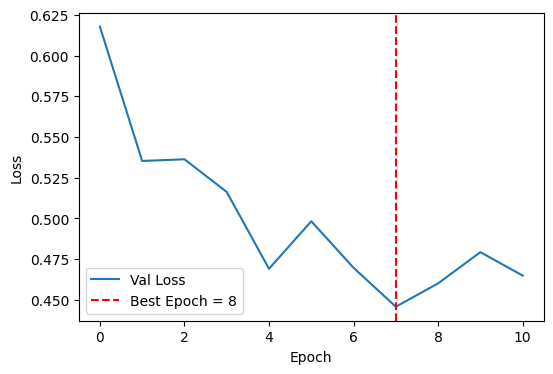

In [15]:
import matplotlib.pyplot as plt
import numpy as np

best_epoch = np.argmin(history.history["val_loss"]) + 1

plt.figure(figsize=(6,4))
plt.plot(history.history["val_loss"], label="Val Loss")
plt.axvline(best_epoch-1, color="r", linestyle="--", label=f"Best Epoch = {best_epoch}")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


## **test evaluation** : best epoch model
our current model  is ALREADY holding the best-epoch weights (epoch = 8).

In [16]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 196ms/step - accuracy: 0.8551 - loss: 0.4090
Test Loss: 0.4090
Test Accuracy: 0.8551


## **model Diagnosis:**
we will compare test accuracy vs val accuracy(from training) of the best model(**epoch 8**) to see wheather it overfitted or not.

**Accuracy comparison**
- Val accuracy ≈ 84.7%
- Test accuracy ≈ 85.5%

Test accuracy is slightly higher than validation, This is a very strong sign of good generalization.

**Loss comparison**
- Val loss = 0.4457
- Test loss = 0.4090

Test loss is LOWER than validation loss This means the model is not overconfident on validation, It generalizes well to unseen data. 🔥



### **SAVE MODEL**
note that our current model  is ALREADY holding the best-epoch weights (epoch = 8).

In [17]:
model.save("recyclable_multiclass_model_best.h5")
print("✅ Best model saved successfully")


✅ Best model saved successfully


## **FINE tuning**
lets See if we can get small improvement in performance of the best generalizing model that we saved.

We will:
- load the best model
- get the frozen backbone of best model
-  Unfreeze top layers only
-  Use very low LR
-  Train 2–3 epochs max
-  Use early stopping again
 

In [18]:
from tensorflow.keras.models import load_model

model = load_model("recyclable_multiclass_model_best.h5")


before we built our model like this (earlier right):

#####  **model = models.Sequential([**
######      base_model,                         # MobileNetV2
######     layers.GlobalAveragePooling2D(),
######     layers.Dense(256, activation="relu"),
######     layers.Dropout(0.5),
######     layers.Dense(NUM_CLASSES, activation="softmax")
##### **])**

In a Sequential model, layers are stored in order.

- model.layers[0]  → MobileNetV2
- model.layers[1]  → GlobalAveragePooling2D
- model.layers[2]  → Dense
- ...

**lets check** 

In [19]:
print(type(model.layers[0]))
print(model.layers[0].name)


<class 'keras.src.models.functional.Functional'>
mobilenetv2_1.00_224




***“when we accessed it via model.layers[0] its confirmed as we can see the backbone was the first layer in the Sequential model,   so lets  selectively unfroze only the top layers for fine-tuning.”***


**UNFREEZE ONLY LAST N LAYERS**


In [20]:
base_model = model.layers[0]  # accessing MobileNetV2 backbone

base_model.trainable = True # we unfroze so that our model can adapt to waste images.

for layer in base_model.layers[:-15]: # unfoze only Top 15 layers. so that we can  preserve general features from low layers.
    layer.trainable = False


RECOMPILE WITH **VERY LOW LR**



In [21]:
import tensorflow as tf

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


FINE-TUNE WITH **EARLY STOPPING**

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop_ft = EarlyStopping(
    monitor="val_loss",
    patience=2,
    restore_best_weights=True
)


In [23]:
history_ft = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5,          # intentionally set small
    callbacks=[early_stop_ft]
)


Epoch 1/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 38s 298ms/step - accuracy: 0.7688 - loss: 0.6229 - val_accuracy: 0.8411 - val_loss: 0.4501
Epoch 2/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 36s 303ms/step - accuracy: 0.8051 - loss: 0.5046 - val_accuracy: 0.8386 - val_loss: 0.4592
Epoch 3/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 36s 302ms/step - accuracy: 0.8276 - loss: 0.4717 - val_accuracy: 0.8472 - val_loss: 0.4675


### **best model**

In [25]:
import numpy as np

val_losses = history_ft.history["val_loss"]
best_epoch = np.argmin(val_losses) + 1   # +1 because epochs are 1-indexed

print(f"Best epoch (lowest val_loss): {best_epoch}")
print(f"Best val_loss: {val_losses[best_epoch-1]:.4f}")


Best epoch (lowest val_loss): 1
Best val_loss: 0.4501


### **EVALUATE best epoch** model ON TEST SET

In [26]:
ft_test_loss, ft_test_acc = model.evaluate(test_data)

print(f"Fine-tuned Test Loss: {ft_test_loss:.4f}")
print(f"Fine-tuned Test Accuracy: {ft_test_acc:.4f}")


26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 199ms/step - accuracy: 0.8551 - loss: 0.4044
Fine-tuned Test Loss: 0.4044
Fine-tuned Test Accuracy: 0.8551


---
##  **frozen model** vs **fine tuned model**

1. **Frozen model (best epoch = 8)**
- Test Accuracy: 0.8551
- Test Loss: 0.4090
2. **Fine-tuned model(best epoch = 1)**
- Test Accuracy: 0.8551
- Test Loss: 0.4044


---
## **Diagnosis**

1. Accuracy
- Exactly the same (0.8551)
-  Fine-tuning did NOT improve classification performance

2. Loss
- Fine-tuned loss is slightly lower (0.4044 vs 0.4090)
- Difference ≈ 0.0046 → negligible
- This is within noise, not a meaningful improvement.

3. Training behavior (from your log)

From epoch 1 of fine-tuning:
- Train accuracy dropped to ~0.77
- Val accuracy ~0.84

**This indicates:**

Fine-tuning is re-adapting features, not clearly learning better ones
No consistent generalization gain.



---
## **Final Verdict**
Retain the frozen-backbone model.

becuase 
 Same test accuracy, No meaningful loss improvement. Frozen model is simpler
more stable,
less prone to future overfitting.

**summary :**

“I performed controlled fine-tuning by unfreezing the top layers with a very low learning rate. Since fine-tuning did not improve test accuracy and only marginally changed loss, I retained the frozen-backbone model for better stability and generalization.”

---
## CONFUSION MATRIX 
to see **per class performance** of frozen model. 

we  will:
1. Load the saved model
2. Recreate the test generator
3. Compute predictions
4. Generate confusion matrix


**note :** confusion matrix not for  fine tuned model.






In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


### Load SAVED **FROZEN MODEL**

In [3]:
model = load_model("recyclable_multiclass_model_best.h5")
print("✅ Frozen best model loaded")

✅ Frozen best model loaded


### **Recreate** TEST Data Generator
(Must match training settings)


In [4]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

test_gen = ImageDataGenerator(rescale=1./255)

test_data = test_gen.flow_from_directory(
    "recyclable_dataset/test",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)


Found 828 images belonging to 6 classes.


#### **Predict on Test Set**

In [5]:
test_data.reset()   

# GET PREDICTIONS ON TEST SET
pred_probs = model.predict(test_data)
y_pred = np.argmax(pred_probs, axis=1)
y_true = test_data.classes


26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 206ms/step


“I reset the data generator before prediction to ensure the internal batch pointer starts from the first sample, preventing misalignment between predictions and true labels.”

In [6]:
class_names = list(test_data.class_indices.keys()) # ensures our confusion matrix rows & columns  are  correctly labeled.
print("Class order:", class_names)


Class order: ['cardboard', 'e-waste', 'glass', 'metal', 'paper', 'plastic']


In [8]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
print(cm)


[[118   1   1   3  12   0]
 [  1 142   3   1   3   0]
 [  2   4 118   9   1   9]
 [  4   1   1 122   3   5]
 [ 10   0   0   2 115   2]
 [  6   2  17  13   4  93]]


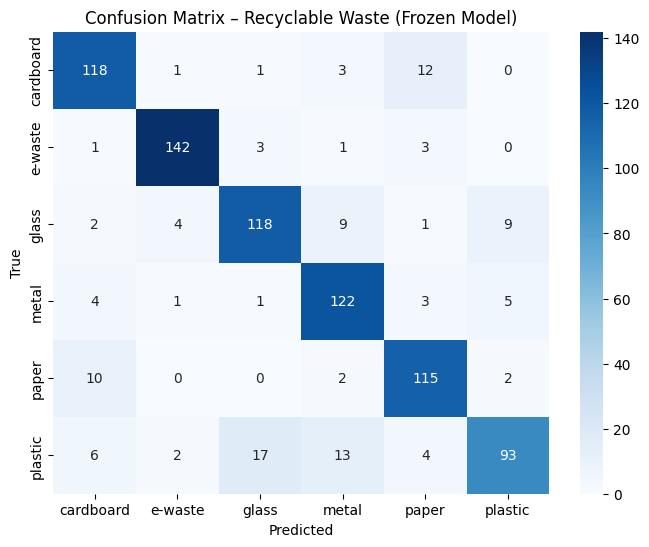

In [9]:
# visuvalising CM

plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix – Recyclable Waste (Frozen Model)")
plt.show()


**Overall Observation** Strong diagonal → good generalization



## **Class-wise** analysis
---
1. **Cardboard**
- Correct: 118
- Main confusion → paper (12)

**Why?**
Cardboard and paper have similar textures, colors, and shapes.
this is  Expected and acceptable confusion.

2. **E-waste (Excellent performance)**
- Correct: 142
- Very few misclassifications

***Distinct visual features:*** circuits, wires, electronics.
therfore its the Best-performing class

3. **Glass**
- Correct: 118

**Confused with:**
- metal (9)
- plastic (9)

becuase Reflective surfaces and transparent materials can appear similar.
 Slight confusion, but reasonable confusion.

4. **Metal**
- Correct: 122
- Minor confusion with plastic & cardboard

Shiny packaging or metallic-looking plastic.
Good performance overall

5. **Paper**
- Correct: 115

**Confused with:** cardboard (10)

Thin cardboard vs thick paper → visual overlap.
Expected confusion.

6. **Plastic** (Hardest class)
- Correct: 93

**Confused with:**
- glass (17)
- metal (13)

 Why?
- Plastic bottles can look like glass
- Foil/plastic packaging resembles metal

This is the most challenging class, very common in waste datasets.


## **CM Report**
The confusion matrix indicates strong diagonal dominance, with most
misclassifications occurring between visually similar recyclable materials
(e.g., paper vs cardboard, plastic vs glass). Categories with distinctive
visual features such as e-waste achieved the highest accuracy, indicating strong feature learning.” Overall,
the model demonstrates robust class-level generalization.


## **classification report**

In [11]:
print(classification_report(
    y_true,
    y_pred,
    target_names=class_names
))


              precision    recall  f1-score   support

   cardboard       0.84      0.87      0.86       135
     e-waste       0.95      0.95      0.95       150
       glass       0.84      0.83      0.83       143
       metal       0.81      0.90      0.85       136
       paper       0.83      0.89      0.86       129
     plastic       0.85      0.69      0.76       135

    accuracy                           0.86       828
   macro avg       0.85      0.85      0.85       828
weighted avg       0.86      0.86      0.85       828

